len(exps)=3


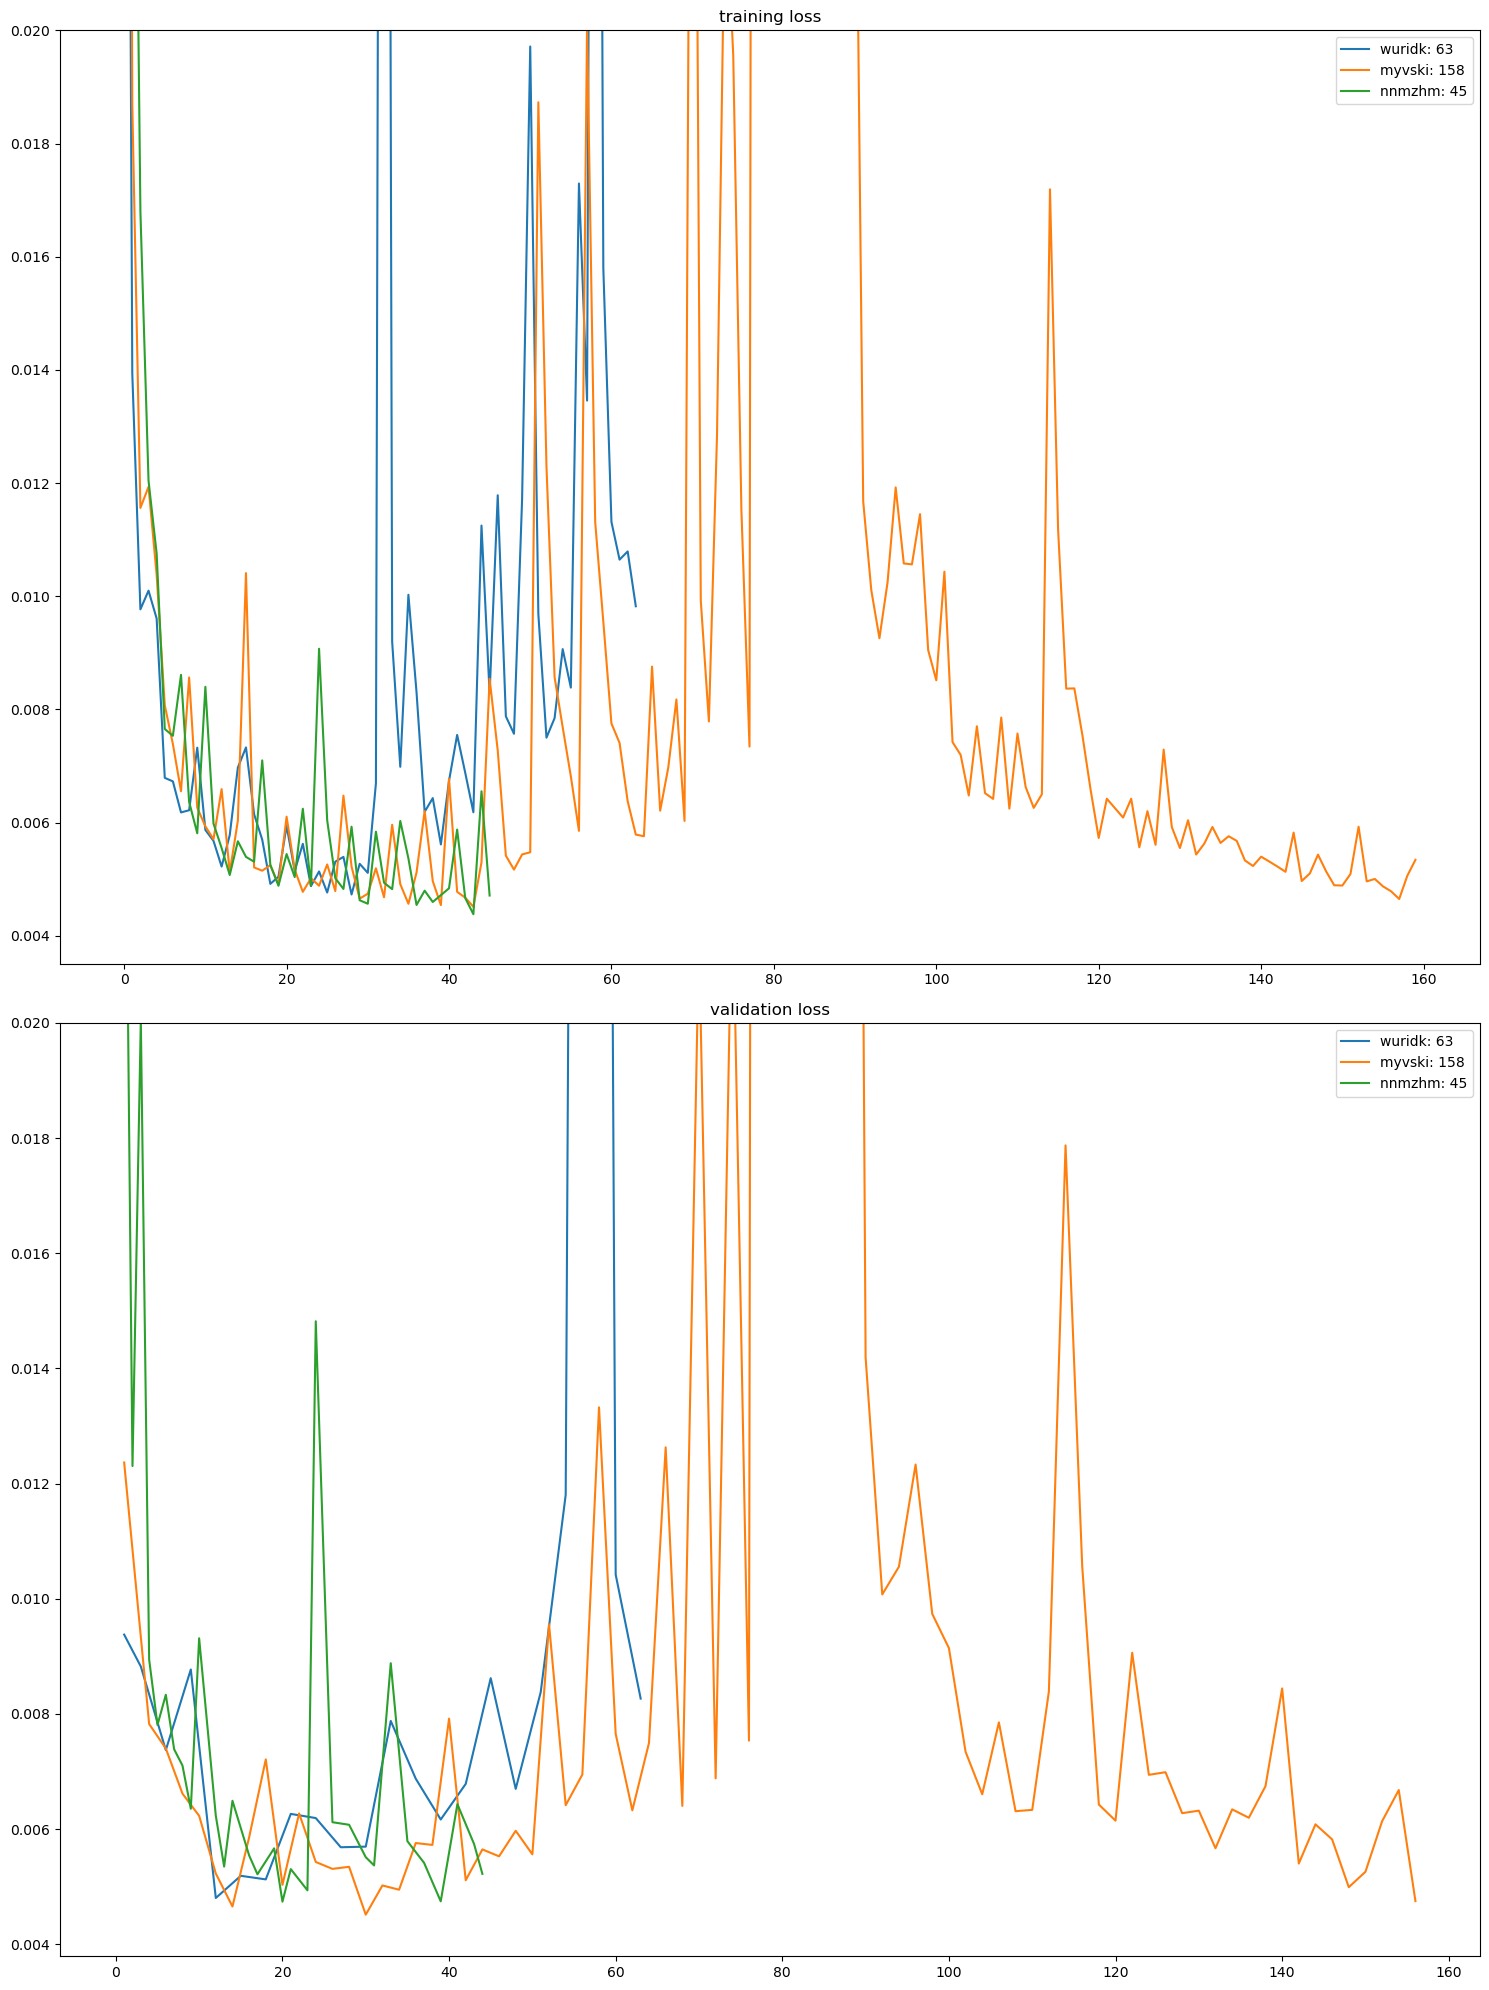

In [2]:
from typing import Set
import matplotlib.pyplot as plt
import matplotlib.axes as axes

import sys
sys.path.append("../..")
from nnexp import checkpoint_util
from nnexp.experiment import Experiment

def plot_one(exp: Experiment, axes: axes.Axes, field: str, label: str):
    if field == 'val_loss_hist':
        if len(exp.val_loss_hist):
            hist_x, hist_y = zip(*exp.val_loss_hist)
        else:
            hist_x, hist_y = list(), list()
    else:
        hist_val = getattr(exp, field, None)
        if hist_val is None:
            return
        hist_x = list(range(len(hist_val)))
        hist_y = hist_val

    if len(hist_y):
        # axes.set_ylim(ymin=min(hist_y), ymax=max(hist_y))
        axes.set_ylim(ymax=.02, ymin=(min(hist_y) * 0.8))
    axes.plot(hist_x, hist_y, label=label)
    axes.legend()

exps = checkpoint_util.list_experiments()
# exps = [exp for exp in exps if exp.shortcode == 'gdyfmh']
exps = [exp for exp in exps if exp.shortcode in ["wuridk", "myvski", "nnmzhm"]]
# exps = [exp for exp in exps if exp.net_class == 'EmbedToLatent']

print(f"{len(exps)=}")
# exps = [exp for exp in exps
#         if exp.net_class == 'Unet'
#         # and exp.net_image_size == 256
#         and exp.image_size == 256
#         and exp.nepochs > 0]

field_map = {
    'train_loss_hist': 'training loss',
    'val_loss_hist': 'validation loss',
    # 'backing_loss_hist': 'backing loss',
    # 'kld_loss_hist': 'kl/d loss'
}

nrows = len(field_map)
fig = plt.figure(1, figsize=(15, 10 * nrows), layout='tight')
axes_list = fig.subplots(nrows=nrows, ncols=1)

for axes, (field, field_label) in zip(axes_list, field_map.items()):
    axes.set_title(field_label)
    for exp in exps:
        plot_one(exp, axes, field, f"{exp.shortcode}: {exp.nepochs}")


In [11]:
import os
from nnexp.denoise import dn_util

print(os.getcwd())
idsdex = checkpoint_util.find_experiment("idsdex")
run = idsdex.get_run(loss_type='vloss')
print(run.checkpoint_path)
net = dn_util.load_model(run.checkpoint_path)
print(net.image_size)


/home/tim/devel/nn-202302/src/nnexp/denoise
runs/checkpoints-ae/20230408-012301-idsdex--k3-s1-256x2-s2-256-s1-128x2-s2-128-s1-64x2-s2-64-s1-8,enc_kern_3,klw_2.0E-05,latdim_8_64_64,ratio_0.042,loss_edge+l2_sqrt+kl/epoch_0066--20230408-131630--tloss.ckpt
using backwards compatible stride parsing:
  k3-s1-256x2-s2-256-s1-128x2-s2-128-s1-64x2-s2-64-s1-8
512
